## Load the data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
df = pd.read_csv("visit_data.csv")

In [22]:
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


As we can see that there are data where some values are missing and if we exmine we will see some outliers

### Task - 1 (Are there duplicates?)

In [23]:
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


There are duplicates in both First and Last names. Which is normal. However, as we can see, there is no duplicate in email. That is good. 

### Task - 2 (do any essential column contain NaN?)

In [24]:
# Notice that we have different ways to format boolean values for the % operator
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


The column visit contains some None values. Given that the final task at hand will probably be predicting the number of visits, we can not do anything with rows which do not have that info. They are a type of `Outliers` for us. Let's get rid of them

### Task - 3 (Get rid of the outliers)

In [25]:
# There are various ways to do this. This is just one way. We encourage you to explore other ways.
# But before that we need to store the previous size of the data set and we will compare it with the new size
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

### Task - 4 (Report the size difference)

In [37]:
# Notice how parameterized format is used and then the indexing is working inside the quote marks
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


### Task - 5 (Box plot visit to further check any Outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa04cc08668>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa04cc08f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa04cc08518>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa04cc117b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa04cc11be0>],
 'means': []}

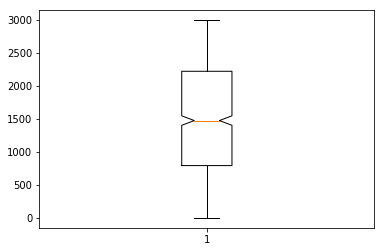

In [39]:
plt.boxplot(df.visit, notch=True)

As we can see that we have data in this column in the interval (0, 3000). However, the main concentration of the data is between ~700 to ~2300. Let us say that anything beyond 2900 and bellow 100 are outliers for us. We need to get rid of them

In [41]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the powerful & operator

In [45]:
# Here we abuse the fact the number of variable can be greater than the number of replacement targets
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


This is the end of the activity for this lesson :)